In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession, DataFrame
%matplotlib inline

In [189]:
spark = (
        SparkSession.builder.appName("MAST30034 Project 2")
        .config("spark.sql.repl.eagerEval.enabled", True) 
        .config("spark.sql.parquet.cacheMetadata", "true")
        .config("spark.sql.session.timeZone", "Etc/UTC")
        .config("spark.driver.memory", "4g")
        .getOrCreate()
    )

In [190]:
merch_df = spark.read.parquet("/Users/oliver/Downloads/merchants_with_tags").toPandas()
df = spark.read.parquet("/Users/oliver/Downloads/final_merchant_statistics").toPandas()

In [139]:
merch_df

,name,merchant_abn,revenue_level,take_rate,antique_shop_sale,appliance_rent_leasing,art_dealer_gallery,artist_supply_craft_shop,bicycle_shop_sale_service,book,...,shoe_shop,silverware_shop,software,souvenir_shop,stationery,telecom,tent_owning_shop,tool,toy_game_shop,watch
0,Odio Tristique Pharetra Associates,93712553837,a,5.93,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Donec Luctus Aliquet Inc.,93720983561,c,1.99,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Quam Quis Diam Company,93723130289,b,3.20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Justo Praesent Luctus Inc.,93726438981,a,5.91,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Tellus Nunc Industries,93732268717,d,1.04,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4021,Et Magnis Dis Corp.,71247553576,a,6.77,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4022,Quam PC,71253802438,b,3.17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4023,Lectus Company,71274812967,b,3.40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4024,Vivamus Molestie Corporation,71305424518,c,2.52,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
merch_df.columns

Index(['name', 'merchant_abn', 'revenue_level', 'take_rate',
       'antique_shop_sale', 'appliance_rent_leasing', 'art_dealer_gallery',
       'artist_supply_craft_shop', 'bicycle_shop_sale_service', 'book',
       'cable', 'card', 'clock', 'computer', 'computer_peripheral_equipment',
       'computer_programming', 'data_processing', 'digital_good_book',
       'equipment', 'except_appliance', 'eyeglass', 'flower', 'forest_supply',
       'furniture', 'gift', 'health_beauty_spa', 'hobby',
       'home_furnishing_equipment_shop', 'including_nursery',
       'integrated_system_design_service', 'jewelry', 'jewelry_repair_shop',
       'lawn_garden_supply_outlet', 'manufacturer',
       'motor_vehicle_supply_new_part', 'movie', 'music',
       'music_shop_musical_instrument', 'newspaper', 'novelty',
       'nursery_stock', 'office_supply_printing_writing_paper', 'optical_good',
       'optician', 'pay_television_radio_service', 'periodical', 'piano',
       'repair', 'restoration_service'

In [142]:
tags = merch_df.columns[4:]
tags

Index(['antique_shop_sale', 'appliance_rent_leasing', 'art_dealer_gallery',
       'artist_supply_craft_shop', 'bicycle_shop_sale_service', 'book',
       'cable', 'card', 'clock', 'computer', 'computer_peripheral_equipment',
       'computer_programming', 'data_processing', 'digital_good_book',
       'equipment', 'except_appliance', 'eyeglass', 'flower', 'forest_supply',
       'furniture', 'gift', 'health_beauty_spa', 'hobby',
       'home_furnishing_equipment_shop', 'including_nursery',
       'integrated_system_design_service', 'jewelry', 'jewelry_repair_shop',
       'lawn_garden_supply_outlet', 'manufacturer',
       'motor_vehicle_supply_new_part', 'movie', 'music',
       'music_shop_musical_instrument', 'newspaper', 'novelty',
       'nursery_stock', 'office_supply_printing_writing_paper', 'optical_good',
       'optician', 'pay_television_radio_service', 'periodical', 'piano',
       'repair', 'restoration_service', 'satellite', 'sheet_music',
       'shoe_shop', 'silverware

## Categorising industry

In [20]:
merchant = pd.read_csv("/Users/oliver/Documents/GitHub/generic-buy-now-pay-later-project-group-19/data/curated/clean_merchant.csv")

In [22]:
merchant['tags'].unique()

array(['furniture, home furnishings and equipment shops, and manufacturers, except appliances',
       'cable, satellite, and other pay television and radio services',
       'jewelry, watch, clock, and silverware shops',
       'watch, clock, and jewelry repair shops',
       'music shops - musical instruments, pianos, and sheet music',
       'gift, card, novelty, and souvenir shops',
       'computers, computer peripheral equipment, and software',
       'computer programming , data processing, and integrated systems design services',
       'equipment, tool, furniture, and appliance  rent al and leasing',
       'artist supply and craft  shops',
       'florists supplies, nursery stock, and flowers',
       'computers, computer peripheral  equipment, and software',
       'antique shops - sales, repairs, and restoration services',
       'motor vehicle supplies and new parts',
       'artist supply and craft shops', 'artist supply  and craft shops',
       'books, periodicals, and 

### Find abn(s) in each tag

In [143]:
abn_in_tags = {tag: merch_df[merch_df[tag] != 0]['merchant_abn'].unique().tolist() for tag in tags}

In [150]:
# 'avg_daily_rev',
#  'avg_value_per_order',
#  'avg_daily_order',
#  'avg_daily_commission',
#  'avg_commission_per_order',
#  'sa2_region_count',
#  'median_customer_income',
#  'returning_customer',
#  'mean_spending',
#  'std_spending',
#  'vip_customer'

tag_summary = {'tag':[],
               'total_no_order':[],
               'avg_take_rate':[],
               'total_avg_daily_rev':[],
               'total_avg_daily_order':[],
               'avg_value_per_order':[],
               'avg_daily_commission':[],
               'avg_commission_per_order':[],
               'avg_median_customer_income':[],
               'total_returning_customer':[],
               'mean_spending_customer':[],
               'std_spending_customer':[],
               'total_vip':[]}

for tag in abn_in_tags.keys():
    filtered_abn = df[df['merchant_abn'].isin(abn_in_tags[tag])]
    tag_summary['tag'].append(tag)
    tag_summary['total_no_order'].append(filtered_abn['no_orders'].sum())
    tag_summary['avg_take_rate'].append(filtered_abn['take_rate'].mean())
    tag_summary['total_avg_daily_rev'].append(filtered_abn['avg_daily_rev'].sum())
    tag_summary['total_avg_daily_order'].append(filtered_abn['avg_daily_order'].sum())
    tag_summary['avg_value_per_order'].append(filtered_abn['avg_value_per_order'].mean())
    tag_summary['avg_daily_commission'].append(filtered_abn['avg_daily_commission'].mean())
    tag_summary['avg_commission_per_order'].append(filtered_abn['avg_commission_per_order'].mean())
    tag_summary['avg_median_customer_income'].append(filtered_abn['median_customer_income'].mean())
    tag_summary['total_returning_customer'].append(filtered_abn['returning_customer'].mean())
    tag_summary['mean_spending_customer'].append(filtered_abn['mean_spending'].mean())
    tag_summary['std_spending_customer'].append(filtered_abn['std_spending'].mean())
    tag_summary['total_vip'].append(filtered_abn['vip_customer'].sum())

tag_summary = pd.DataFrame(tag_summary)

In [151]:
tag_summary.sort_values('avg_value_per_order', ascending=False)

,tag,total_no_order,avg_take_rate,total_avg_daily_rev,total_avg_daily_order,avg_value_per_order,avg_daily_commission,avg_commission_per_order,avg_median_customer_income,total_returning_customer,mean_spending_customer,std_spending_customer,total_vip
26,jewelry,696.0,3.451099,1039.077734,1.150413,1249.386511,0.609349,44.386683,819.798546,0.000000,1249.445587,501.739948,13.0
48,silverware_shop,696.0,3.451099,1039.077734,1.150413,1249.386511,0.609349,44.386683,819.798546,0.000000,1249.445587,501.739948,13.0
52,telecom,22700.0,3.947440,25135.144741,37.520661,1138.244252,8.641206,43.809901,813.088450,0.850000,1140.974120,515.354447,549.0
2,art_dealer_gallery,13129.0,3.815982,20138.880953,21.700826,1129.301138,8.156134,42.289555,807.849618,0.130841,1131.438861,511.505173,266.0
1,appliance_rent_leasing,27830.0,3.993582,23448.355586,46.000000,1064.587187,6.824817,42.482751,803.178105,0.729323,1066.851245,507.549233,773.0
54,tool,27830.0,3.993582,23448.355586,46.000000,1064.587187,6.824817,42.482751,803.178105,0.729323,1066.851245,507.549233,773.0
14,equipment,27830.0,3.993582,23448.355586,46.000000,1064.587187,6.824817,42.482751,803.178105,0.729323,1066.851245,507.549233,773.0
22,hobby,228161.0,4.398521,74557.548632,377.125620,759.188961,25.180597,33.600806,823.445696,93.563380,765.979024,417.197411,7547.0
55,toy_game_shop,228161.0,4.398521,74557.548632,377.125620,759.188961,25.180597,33.600806,823.445696,93.563380,765.979024,417.197411,7547.0
19,furniture,515860.0,4.418006,168849.538270,852.661157,724.891674,22.237499,31.684296,810.112825,117.990476,732.745855,358.838781,16086.0


### Defining Segments

There are industries that experience high growth during an economic boom but suffer tremendously during recession. We call these recession-vulnerable industries and an example of this would be retail, hospitality and leisure industries. On the other hand, tech industry and repair industry are generally recession-proof as they have grown to be essentials in our daily life. As part of our diversification strategy, we aim to segment merchants into the following categories:

Credits: https://www.cnbc.com/2012/06/01/Industries-Hit-Hardest-by-the-Recession.html


#### Recession-vulnerable industries:
- **Luxury Goods** - High `avg_value_per_order` and non-service oriented industry such as jewelry and arts. This category should see low returning and vip customer rate as well as relatively high variance in customer spendings.
- **Leisure Goods** - Hobbies, toys, books as well as outdoor activities essentials. Generally high variance in customer spendings.
- **Home Furnishings** - Home furnishing industry. This industry should see high `avg_value_per_order` and `avg_daily_order`.
- **Gifts & Souvenir** - Gifts, flowers, souvenir, etc industry. Generally low `avg_value_per_order` but high `avg_daily_order`.
- **Clothing & Accessories** - Fashion and accessories industry.
- **Office Equipments** - Office supplies, stationery etc.

#### Recession-proof industries:
- **Repair Services** - General repair services industry. This industry should see high `avg_value_per_order` and generally high number of order as well.
- **Technology & Telecommunication** - electronic devices, telecommunication, systems and software-related industry. Generally high `total_avg_daily_rev` and high `avg_daily_order` due to how big the market is.
- **Motor & Bicycles** - Motor, bicycle supplies and parts. 
- **Health & Wellness** - Health related services.

In [153]:
rv_ind = {'luxury goods':['art_dealer_gallery','antique_shop_sale','jewelry','silverware_shop'],
         'leisure goods and services':['artist_supply_craft_shop','book','digital_good_book','hobby',\
                         'music_shop_musical_instrument', 'newspaper', \
                          'novelty', 'periodical', 'piano','sheet_music','toy_game_shop',\
                          'forest_supply','movie', 'music','tent_owning_shop'],
         'home furnishings':['furniture','home_furnishing_equipment_shop','nursery_stock',\
                            'including_nursery','lawn_garden_supply_outlet'],
         'gifts souvenirs':['card','flower','forest_supply','gift','souvenir_shop'],
         'clothing and accessories':['watch','shoe_shop'],
         'office equipments':['office_supply_printing_writing_paper','stationery']}

rp_ind = {'repair services':['repair', 'restoration_service','jewelry_repair_shop'],
          'tech and telecom':['computer', 'computer_peripheral_equipment','computer_programming', \
                              'data_processing','integrated_system_design_service','pay_television_radio_service',\
                              'satellite','telecom','software','cable'],
          'motor and bicycles':['bicycle_shop_sale_service','motor_vehicle_supply_new_part'],
          'health and wellness':['optical_good', 'optician','eyeglass','health_beauty_spa']}

ind = {**rv_ind, **rp_ind}

In [157]:
def industry_segment(tag, industry):
    for ind in industry.keys():
        if tag in industry[ind]:
            return ind
        
    return 'miscellaneous'

In [158]:
tag_summary['industry_segment'] = tag_summary.apply(lambda x: industry_segment(x['tag'], ind), axis=1)

In [159]:
tag_summary

,tag,total_no_order,avg_take_rate,total_avg_daily_rev,total_avg_daily_order,avg_value_per_order,avg_daily_commission,avg_commission_per_order,avg_median_customer_income,total_returning_customer,mean_spending_customer,std_spending_customer,total_vip,industry_segment
0,antique_shop_sale,174479.0,4.083023,43751.343624,288.395041,707.190425,20.640474,32.883912,809.096497,134.101266,715.066317,265.640767,5805.0,luxury goods
1,appliance_rent_leasing,27830.0,3.993582,23448.355586,46.000000,1064.587187,6.824817,42.482751,803.178105,0.729323,1066.851245,507.549233,773.0,miscellaneous
2,art_dealer_gallery,13129.0,3.815982,20138.880953,21.700826,1129.301138,8.156134,42.289555,807.849618,0.130841,1131.438861,511.505173,266.0,luxury goods
3,artist_supply_craft_shop,455794.0,4.366373,194224.872453,753.378512,554.702817,45.147213,23.719744,821.094709,151.678756,568.484906,366.557356,12653.0,leisure goods and services
4,bicycle_shop_sale_service,218680.0,4.457529,95711.075313,361.454545,610.336356,27.225450,28.624218,815.309075,23.511765,617.686347,355.210037,8328.0,motor and bicycles
5,book,393027.0,4.399817,163929.029791,649.631405,322.979654,41.795681,14.310537,834.215038,121.701220,336.511756,230.184173,14024.0,leisure goods and services
6,cable,947721.0,4.616571,124633.502324,1566.480992,90.468017,35.127869,4.187872,821.588003,290.971429,100.688031,59.253051,32847.0,tech and telecom
7,card,1608847.0,4.655165,184007.405019,2659.251240,76.659002,48.841495,3.625122,826.485138,851.076923,93.539767,61.563484,35375.0,gifts souvenirs
8,clock,1018932.0,4.187739,125719.124224,1684.185124,403.882207,27.061148,15.176199,819.147807,316.191304,412.272693,161.670801,24043.0,miscellaneous
9,computer,708353.0,4.585856,198074.609954,1170.831405,346.440250,47.467434,16.347697,820.557324,287.546961,362.028075,248.726681,19834.0,tech and telecom


In [115]:
cat = []
for item in rv_ind.keys():
    cat += rv_ind[item]
    
for item in rp_ind.keys():
    cat += rp_ind[item]
    
cat = set(cat)

In [116]:
set(new_tags)- cat

{'appliance_rent_leasing',
 'clock',
 'equipment',
 'except_appliance',
 'manufacturer',
 'tool'}

In [172]:
plot_order

array(['leisure goods and services', 'tech and telecom',
       'gifts souvenirs', 'health and wellness', 'home furnishings',
       'miscellaneous', 'clothing and accessories', 'repair services',
       'motor and bicycles', 'office equipments', 'luxury goods'],
      dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'leisure goods and services'),
  Text(1, 0, 'tech and telecom'),
  Text(2, 0, 'gifts souvenirs'),
  Text(3, 0, 'health and wellness'),
  Text(4, 0, 'home furnishings'),
  Text(5, 0, 'miscellaneous'),
  Text(6, 0, 'clothing and accessories'),
  Text(7, 0, 'repair services'),
  Text(8, 0, 'motor and bicycles'),
  Text(9, 0, 'office equipments'),
  Text(10, 0, 'luxury goods')])

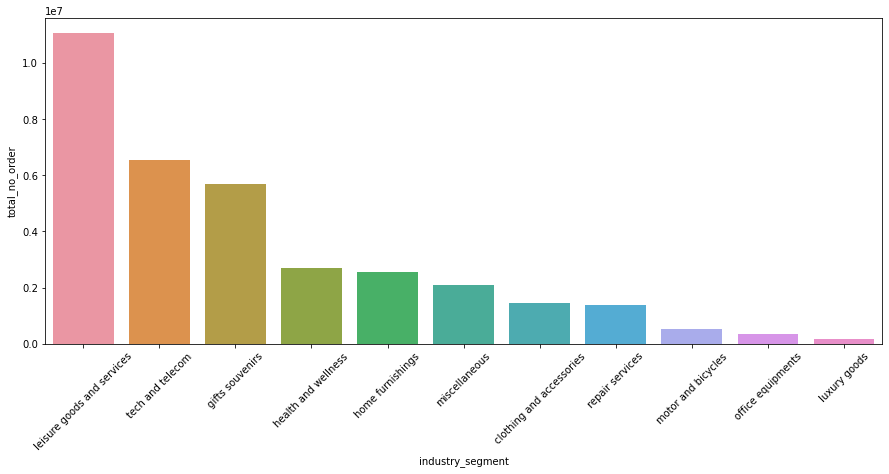

In [179]:
plt.figure(figsize=(15,6))
plot_order = tag_summary.groupby('industry_segment')['total_no_order'].sum().sort_values(ascending=False).index.values
sns.barplot(x='industry_segment', y='total_no_order', data=tag_summary, order=plot_order, ci=False, estimator=sum)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'gifts souvenirs'),
  Text(1, 0, 'leisure goods and services'),
  Text(2, 0, 'clothing and accessories'),
  Text(3, 0, 'health and wellness'),
  Text(4, 0, 'tech and telecom'),
  Text(5, 0, 'home furnishings'),
  Text(6, 0, 'repair services'),
  Text(7, 0, 'miscellaneous'),
  Text(8, 0, 'motor and bicycles'),
  Text(9, 0, 'office equipments'),
  Text(10, 0, 'luxury goods')])

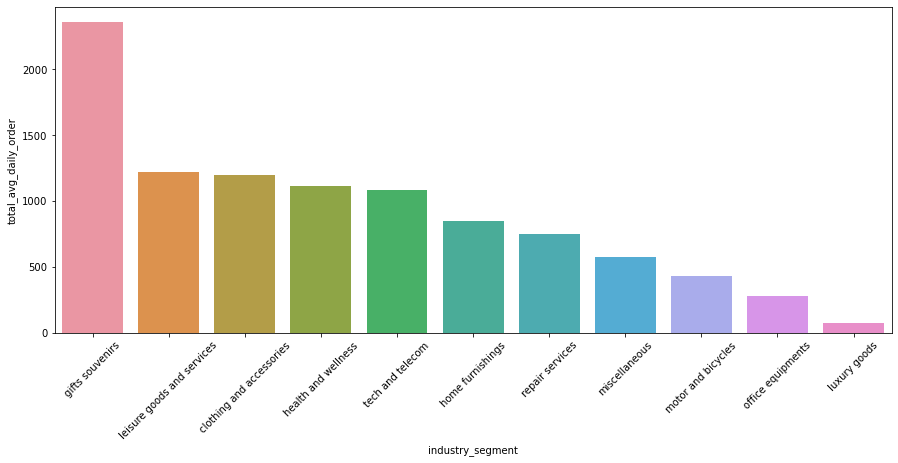

In [185]:
plt.figure(figsize=(15,6))
plot_order = tag_summary.groupby('industry_segment')['total_avg_daily_order'].mean().sort_values(ascending=False).index.values
sns.barplot(x='industry_segment', y='total_avg_daily_order', data=tag_summary, order=plot_order, ci=False, estimator=np.mean)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'gifts souvenirs'),
  Text(1, 0, 'home furnishings'),
  Text(2, 0, 'tech and telecom'),
  Text(3, 0, 'leisure goods and services'),
  Text(4, 0, 'clothing and accessories'),
  Text(5, 0, 'office equipments'),
  Text(6, 0, 'health and wellness'),
  Text(7, 0, 'motor and bicycles'),
  Text(8, 0, 'miscellaneous'),
  Text(9, 0, 'repair services'),
  Text(10, 0, 'luxury goods')])

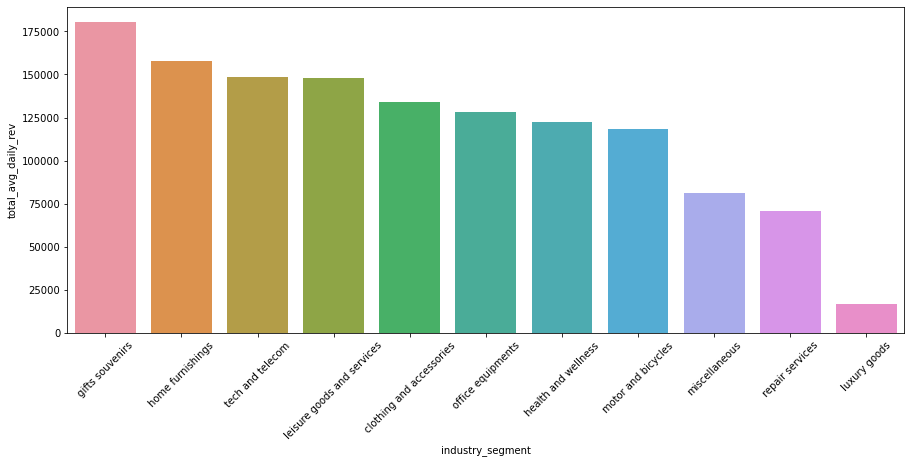

In [186]:
plt.figure(figsize=(15,6))
plot_order = tag_summary.groupby('industry_segment')['total_avg_daily_rev'].mean().sort_values(ascending=False).index.values
sns.barplot(x='industry_segment', y='total_avg_daily_rev', data=tag_summary, order=plot_order, ci=False, estimator=np.mean)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'gifts souvenirs'),
  Text(1, 0, 'leisure goods and services'),
  Text(2, 0, 'tech and telecom'),
  Text(3, 0, 'motor and bicycles'),
  Text(4, 0, 'home furnishings'),
  Text(5, 0, 'health and wellness'),
  Text(6, 0, 'office equipments'),
  Text(7, 0, 'clothing and accessories'),
  Text(8, 0, 'repair services'),
  Text(9, 0, 'miscellaneous'),
  Text(10, 0, 'luxury goods')])

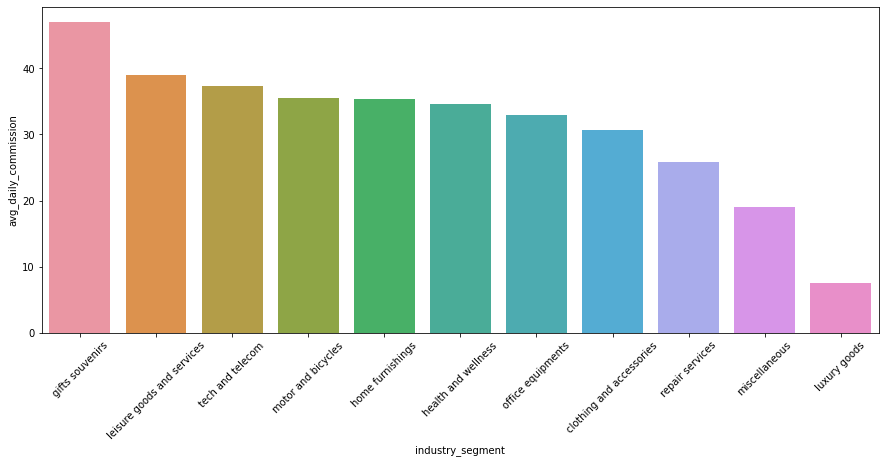

In [187]:
plt.figure(figsize=(15,6))
plot_order = tag_summary.groupby('industry_segment')['avg_daily_commission'].mean().sort_values(ascending=False).index.values
sns.barplot(x='industry_segment', y='avg_daily_commission', data=tag_summary, order=plot_order, ci=False, estimator=np.mean)
plt.xticks(rotation=45)